# Activity 3.2: Observation Localisation

## 1. Introduction

In this activity, we will explore the concept of localisation, where an effect of observation is restricted to some spatial area. We will use the same setup as in Activity 3.1.

In [1]:
# Easier version. 2017. JA
import numpy as np
from common_misc import gen_obs, rmse_spread, createH
from common_plots import plotRMSP
from L96_model import lorenz96
from L96_kfs import kfs_lor96
from L96_plots import plotL96, plotL96obs, plotL96DA_kf

## 2. Compute the Nature Run

As before, we run the Lorenz 96 dynamical model with 12 variables to generate the truth. 

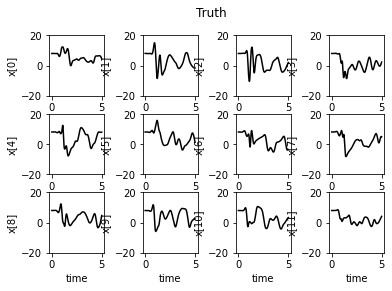

In [2]:
model = 'L96'
x0 = None # let it spin from rest (x_n(t=0) = F, forall n )
tmax = 5
Nx = 12
t, xt = lorenz96(tmax, x0, Nx) # Nx>=12
plotL96(t, xt, Nx)

# imperfect initial guess for our DA experiments
forc = 8.0
aux1 = forc * np.ones(Nx)
aux2 = range(Nx)
x0guess = aux1 + ((-1)*np.ones(Nx))**aux2

## 3. Generate observations

Again, as before, we generate observations (red dots) for every second variable at every 10 time steps.

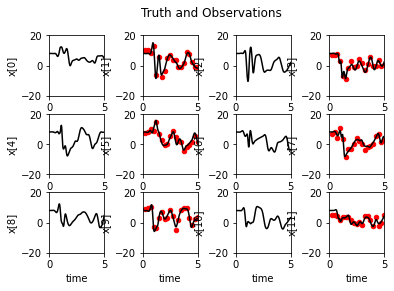

In [3]:
# Decide what variables to observe
obsgrid = '1010'
H, observed_vars = createH(obsgrid, model, Nx)
period_obs = 10
var_obs = 2
# Generating the observations
seed = 1
tobs, y, R = gen_obs(t, xt, period_obs, H, var_obs, seed)
plotL96obs(t, xt, Nx, tobs, y, observed_vars)

## 4. Observation localisation

Set the ensemble size M=10. The localisation parameter `lam` limits the use of observations that are far away in space.

An assimilation is performed at every observation time and background is generated for every assimilation. We show the analysis for each ensemble member, their mean, and ensemble spread. 

Run the experiments with `lam=2` and `lam=None`, where None means that all the observations are used. How does the analysis change? What is the effect on the ensemble spread? 

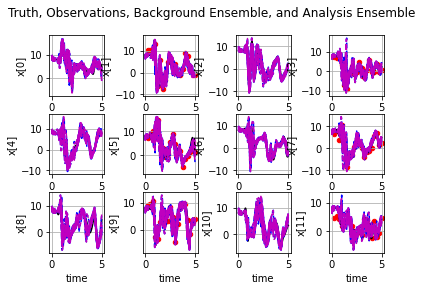

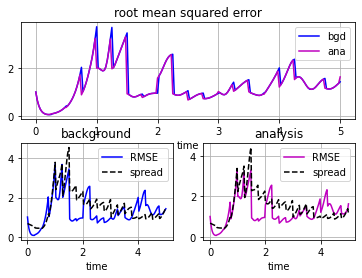

In [4]:
### 3. Data assimilation using KFa (SEnKF, LSEnKF and ETKF)
# No LETKF since R-localisation is extremely slow without parallel implementation    
rho = 0.1
M = 10
lam = 2
loctype = 'GC'
met = 'SEnKF' 
Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

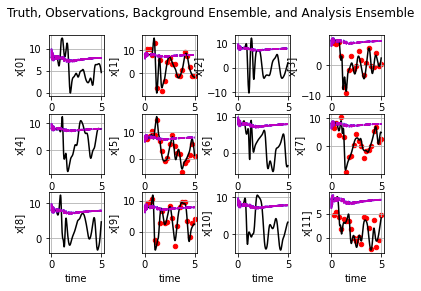

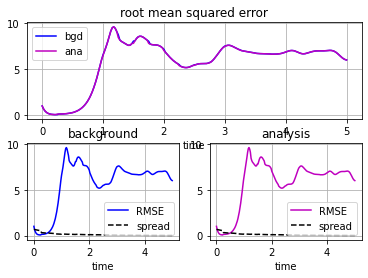

In [5]:
lam = None

Xb,xb,Xa,xa,locmatrix = kfs_lor96(x0guess,t,tobs,y,H,R,rho,M,met,lam,loctype)
plotL96DA_kf(t,xt,tobs,y,Nx,observed_vars,Xb,xb,Xa,xa)

rmse_step=1
rmseb,spreadb = rmse_spread(xt,xb,Xb,rmse_step)
rmsea,spreada = rmse_spread(xt,xa,Xa,rmse_step)
plotRMSP(t,rmseb,rmsea,spreadb,spreada)

## 5. Conclusions

We experimented with using observation localisation for the Stochastic Ensemble Kalman filter. Its importance is clear: if no observation localisation is used then assimilation may produce poor results even though high quality observations and large ensembles are available. This is because correlations are being made between unrelated values.  